<a href="https://colab.research.google.com/github/pranilbasu/ML-Projects/blob/main/ML_Project_Forest_Fire_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Forest Fire 

In [ ]:
# Importing Libraries
import datetime as dt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
forest = pd.read_csv('fire_archive.csv')  # importing dataset

In [ ]:
forest.head() #preview of data

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,1.0,2019-08-01,56,Terra,MODIS,48,6.3,297.3,6.6,D,0
1,-11.7924,142.0850,319.3,1.0,1.0,2019-08-01,56,Terra,MODIS,71,6.3,297.3,11.3,D,0
2,-12.8398,132.8744,311.6,3.1,1.7,2019-08-01,57,Terra,MODIS,42,6.3,298.7,23.1,D,0
3,-14.4306,143.3035,310.1,1.1,1.1,2019-08-01,57,Terra,MODIS,33,6.3,296.1,6.5,D,0
4,-12.4953,131.4897,310.3,4.0,1.9,2019-08-01,57,Terra,MODIS,36,6.3,298.8,27.6,D,0


In [ ]:
forest.isnull().sum()  # null values (if present)

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64

In [ ]:
forest.describe()

,latitude,longitude,brightness,scan,track,acq_time,confidence,version,bright_t31,frp,type
count,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,3.601100e+04,36011.000000,36011.000000,36011.000000
mean,-19.100962,138.931446,328.750696,1.620905,1.215281,600.025798,67.551387,6.300000e+00,301.339138,51.132176,0.019439
std,7.265777,9.261400,18.992808,0.813764,0.247852,548.369111,23.179946,3.728625e-12,9.724462,92.280112,0.198326
min,-42.762800,114.104300,300.000000,1.000000,1.000000,0.000000,0.000000,6.300000e+00,267.000000,0.000000,0.000000
25%,-26.370250,131.072250,316.500000,1.100000,1.000000,205.000000,52.000000,6.300000e+00,293.600000,13.800000,0.000000
50%,-15.706500,136.738500,326.400000,1.300000,1.100000,424.000000,70.000000,6.300000e+00,302.400000,25.800000,0.000000
75%,-13.343600,147.477500,336.700000,1.900000,1.300000,600.000000,86.000000,6.300000e+00,308.600000,52.800000,0.000000
max,-10.072600,153.490400,504.400000,4.800000,2.000000,2359.000000,100.000000,6.300000e+00,400.100000,3679.500000,3.000000


In [ ]:
print(forest['instrument'].value_counts())

MODIS    36011
Name: instrument, dtype: int64


In [ ]:
print(forest['version'].value_counts())

6.3    36011
Name: version, dtype: int64


In [ ]:
forest = forest.drop(['instrument', 'version'], axis = 1)   # these two categories have only one type of data

#### Encoding Categorical Data

In [ ]:
# encoding Satellite and Daynight map categories
daynight_map = {"D": 1, "N": 0}
satellite_map = {"Terra": 1, "Aqua": 0}

forest['daynight'] = forest['daynight'].map(daynight_map)
forest['satellite'] = forest['satellite'].map(satellite_map)

In [ ]:
forest.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,1.0,2019-08-01,56,1,48,297.3,6.6,1,0
1,-11.7924,142.0850,319.3,1.0,1.0,2019-08-01,56,1,71,297.3,11.3,1,0
2,-12.8398,132.8744,311.6,3.1,1.7,2019-08-01,57,1,42,298.7,23.1,1,0
3,-14.4306,143.3035,310.1,1.1,1.1,2019-08-01,57,1,33,296.1,6.5,1,0
4,-12.4953,131.4897,310.3,4.0,1.9,2019-08-01,57,1,36,298.8,27.6,1,0


In [ ]:
# Encoding type feature
types = pd.get_dummies(forest['type'])
forest = pd.concat([forest, types], axis=1)

forest = forest.drop(['type'], axis = 1)

forest = forest.rename(columns={0: 'type_0', 2: 'type_2', 3: 'type_3'}) # renaming the columns

In [ ]:
forest.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type_0,type_2,type_3
0,-11.8070,142.0583,313.0,1.0,1.0,2019-08-01,56,1,48,297.3,6.6,1,1,0,0
1,-11.7924,142.0850,319.3,1.0,1.0,2019-08-01,56,1,71,297.3,11.3,1,1,0,0
2,-12.8398,132.8744,311.6,3.1,1.7,2019-08-01,57,1,42,298.7,23.1,1,1,0,0
3,-14.4306,143.3035,310.1,1.1,1.1,2019-08-01,57,1,33,296.1,6.5,1,1,0,0
4,-12.4953,131.4897,310.3,4.0,1.9,2019-08-01,57,1,36,298.8,27.6,1,1,0,0


In [ ]:
bins = [0, 1, 2, 3, 4, 5]
labels = [1,2,3,4,5]
forest['scan_binned'] = pd.cut(forest['scan'], bins=bins, labels=labels)  # categorizing the continuous values of scan feature into discrete values using binning method

In [ ]:
forest.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type_0,type_2,type_3,scan_binned
0,-11.8070,142.0583,313.0,1.0,1.0,2019-08-01,56,1,48,297.3,6.6,1,1,0,0,1
1,-11.7924,142.0850,319.3,1.0,1.0,2019-08-01,56,1,71,297.3,11.3,1,1,0,0,1
2,-12.8398,132.8744,311.6,3.1,1.7,2019-08-01,57,1,42,298.7,23.1,1,1,0,0,4
3,-14.4306,143.3035,310.1,1.1,1.1,2019-08-01,57,1,33,296.1,6.5,1,1,0,0,2
4,-12.4953,131.4897,310.3,4.0,1.9,2019-08-01,57,1,36,298.8,27.6,1,1,0,0,4


In [ ]:
forest.drop(['scan'], axis = 1, inplace = True)

In [ ]:
# Converting strings to timestamp values

forest['acq_date'] = pd.to_datetime(forest['acq_date'])

In [ ]:
# Extraction of year, month and date of data acquisition
forest['year'] = forest['acq_date'].dt.year  
forest['month'] = forest['acq_date'].dt.month
forest['day'] = forest['acq_date'].dt.day

In [ ]:
forest.head()

,latitude,longitude,brightness,track,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type_0,type_2,type_3,scan_binned,year,month,day
0,-11.8070,142.0583,313.0,1.0,2019-08-01,56,1,48,297.3,6.6,1,1,0,0,1,2019,8,1
1,-11.7924,142.0850,319.3,1.0,2019-08-01,56,1,71,297.3,11.3,1,1,0,0,1,2019,8,1
2,-12.8398,132.8744,311.6,1.7,2019-08-01,57,1,42,298.7,23.1,1,1,0,0,4,2019,8,1
3,-14.4306,143.3035,310.1,1.1,2019-08-01,57,1,33,296.1,6.5,1,1,0,0,2,2019,8,1
4,-12.4953,131.4897,310.3,1.9,2019-08-01,57,1,36,298.8,27.6,1,1,0,0,4,2019,8,1


In [ ]:
forest.drop(['acq_date'], axis = 1, inplace = True)

### ML Model

In [ ]:
# Separation of variables
Y = forest['confidence']  # dependent variable
X = forest.drop(['confidence', 'acq_time', 'bright_t31', 'type_0'], axis = 1) # independent varibale

In [ ]:
X.head()

,latitude,longitude,brightness,track,satellite,frp,daynight,type_2,type_3,scan_binned,year,month,day
0,-11.8070,142.0583,313.0,1.0,1,6.6,1,0,0,1,2019,8,1
1,-11.7924,142.0850,319.3,1.0,1,11.3,1,0,0,1,2019,8,1
2,-12.8398,132.8744,311.6,1.7,1,23.1,1,0,0,4,2019,8,1
3,-14.4306,143.3035,310.1,1.1,1,6.5,1,0,0,2,2019,8,1
4,-12.4953,131.4897,310.3,1.9,1,27.6,1,0,0,4,2019,8,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 42, n_jobs = -1)
regressor.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=42)

In [ ]:
Y_pred = regressor.predict(X_test)

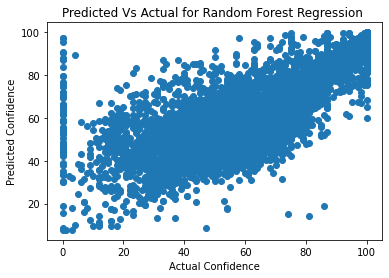

In [ ]:
# visualization of the difference between the actual and predicted Confidence of forest fire for Random Forest Regression
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual Confidence")
plt.ylabel("Predicted Confidence")
plt.title("Predicted Vs Actual for Random Forest Regression ")
plt.show()

### Testing the model

In [ ]:
from sklearn import metrics
metrics.r2_score(Y_test, Y_pred)*100

65.91332501351246